# Risk Analysis


### Overview 
My goal is to figure out which aircraft are the safest for the company to buy. I am looking at accident data to find the lowest risk options.
### Data
I'm using the Aviation Data.csv dataset.
This notebook is divided into two parts, exploration and analysis in which we clean and analyse the data indepth inorder to give a clear recomendation

In [24]:
import pandas as pd
import matplotlib.pyplot as plt


### 1. Data Exploration and Cleaning

The data is messy so I need to:
1. Fix missing values
2. Fix Column Names

In [25]:
df = pd.read_csv("Aviation_Data.csv")


c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Brief summary of the dataset.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

Checking for total number of missing values in each column.

In [27]:
df.isna().sum()

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

Checking for total number of duplicate values.

In [28]:
df.duplicated().sum()

1390

Dropping all duplicate values.

In [29]:
df.drop_duplicates()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90343,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
90344,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
90345,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
90346,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Checking for duplicate values after dropping.

In [30]:
df.duplicated().sum()

1390

Replacing missing values with a zero in the following columns.

In [31]:
df['Total.Fatal.Injuries'] = df['Total.Fatal.Injuries'].fillna(0)
df['Total.Serious.Injuries'] = df['Total.Serious.Injuries'].fillna(0)
df['Total.Minor.Injuries'] = df['Total.Minor.Injuries'].fillna(0)
df['Total.Uninjured'] = df['Total.Uninjured'].fillna(0)
df['Number.of.Engines'] = df['Number.of.Engines'].fillna(0)

Dropping all the missing values in the following columns.


In [32]:
df.dropna(subset=['Make'], inplace=True)
df.dropna(subset=['Model'], inplace=True)
df.dropna(subset=['Engine.Type'], inplace=True)
df.dropna(subset=['Aircraft.Category'], inplace=True)
df.dropna(subset=['Aircraft.damage'], inplace=True)

Combining Make and Model as one column

In [33]:
df['Air_craft'] = df['Make'] + " " + df['Model']


Checking if the newly created column is in our dataframe.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26057 entries, 5 to 90226
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                26057 non-null  object 
 1   Investigation.Type      26057 non-null  object 
 2   Accident.Number         26057 non-null  object 
 3   Event.Date              26057 non-null  object 
 4   Location                26051 non-null  object 
 5   Country                 26046 non-null  object 
 6   Latitude                21865 non-null  object 
 7   Longitude               21854 non-null  object 
 8   Airport.Code            17154 non-null  object 
 9   Airport.Name            17886 non-null  object 
 10  Injury.Severity         25981 non-null  object 
 11  Aircraft.damage         26057 non-null  object 
 12  Aircraft.Category       26057 non-null  object 
 13  Registration.Number     25958 non-null  object 
 14  Make                    26057 non-null

Filtering

In [35]:
Df = df[['Injury.Severity','Aircraft.damage','Aircraft.Category','Air_craft','Amateur.Built','Number.of.Engines','Engine.Type','Total.Fatal.Injuries','Total.Serious.Injuries','Total.Minor.Injuries','Total.Uninjured','Weather.Condition']]
Df

,Injury.Severity,Aircraft.damage,Aircraft.Category,Air_craft,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
5,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas DC9,No,2.0,Turbo Fan,0.0,0.0,1.0,44.0,VMC
7,Non-Fatal,Substantial,Airplane,Cessna 140,No,1.0,Reciprocating,0.0,0.0,0.0,2.0,VMC
8,Non-Fatal,Substantial,Airplane,Cessna 401B,No,2.0,Reciprocating,0.0,0.0,0.0,2.0,IMC
12,Non-Fatal,Destroyed,Airplane,Bellanca 17-30A,No,1.0,Reciprocating,0.0,0.0,1.0,0.0,IMC
13,Fatal(1),Destroyed,Airplane,Cessna R172K,No,1.0,Reciprocating,1.0,0.0,0.0,0.0,IMC
...,...,...,...,...,...,...,...,...,...,...,...,...
90098,Non-Fatal,Substantial,Airplane,CESSNA 150,No,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC
90106,Non-Fatal,Substantial,Airplane,CESSNA 177RG,No,1.0,Reciprocating,0.0,0.0,0.0,2.0,VMC
90120,Non-Fatal,Substantial,Airplane,BEECH B-60,No,2.0,Reciprocating,0.0,0.0,0.0,1.0,VMC
90194,Minor,Substantial,Airplane,STEPHEN J HOFFMAN MS-500,Yes,1.0,Reciprocating,0.0,1.0,0.0,0.0,VMC


Checking for missing values in the newly created dataframe.

In [36]:
Df.isna().sum()

Injury.Severity            76
Aircraft.damage             0
Aircraft.Category           0
Air_craft                   0
Amateur.Built               7
Number.of.Engines           0
Engine.Type                 0
Total.Fatal.Injuries        0
Total.Serious.Injuries      0
Total.Minor.Injuries        0
Total.Uninjured             0
Weather.Condition         656
dtype: int64

Checking for duplicate values in our newly created dataframe.

In [37]:
Df.duplicated().sum()

8720

Dropping duplicate values and renaming our cleaned dataframe.

In [38]:
Cleaned_df = Df.drop_duplicates()
Cleaned_df

,Injury.Severity,Aircraft.damage,Aircraft.Category,Air_craft,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
5,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas DC9,No,2.0,Turbo Fan,0.0,0.0,1.0,44.0,VMC
7,Non-Fatal,Substantial,Airplane,Cessna 140,No,1.0,Reciprocating,0.0,0.0,0.0,2.0,VMC
8,Non-Fatal,Substantial,Airplane,Cessna 401B,No,2.0,Reciprocating,0.0,0.0,0.0,2.0,IMC
12,Non-Fatal,Destroyed,Airplane,Bellanca 17-30A,No,1.0,Reciprocating,0.0,0.0,1.0,0.0,IMC
13,Fatal(1),Destroyed,Airplane,Cessna R172K,No,1.0,Reciprocating,1.0,0.0,0.0,0.0,IMC
...,...,...,...,...,...,...,...,...,...,...,...,...
90028,Serious,Substantial,Powered Parachute,DESTINY XLT,No,1.0,Reciprocating,0.0,1.0,1.0,0.0,VMC
90030,Minor,Substantial,Airplane,HIBBARD NORMAN E THORP T-18,Yes,1.0,Reciprocating,0.0,1.0,0.0,0.0,VMC
90096,Non-Fatal,Substantial,Airplane,WASZAK ARTHUR B WITTMAN TAILWIND W10,Yes,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC
90120,Non-Fatal,Substantial,Airplane,BEECH B-60,No,2.0,Reciprocating,0.0,0.0,0.0,1.0,VMC


In [39]:
Cleaned_df.duplicated().sum()

0

In [40]:
Cleaned_df

,Injury.Severity,Aircraft.damage,Aircraft.Category,Air_craft,Amateur.Built,Number.of.Engines,Engine.Type,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
5,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas DC9,No,2.0,Turbo Fan,0.0,0.0,1.0,44.0,VMC
7,Non-Fatal,Substantial,Airplane,Cessna 140,No,1.0,Reciprocating,0.0,0.0,0.0,2.0,VMC
8,Non-Fatal,Substantial,Airplane,Cessna 401B,No,2.0,Reciprocating,0.0,0.0,0.0,2.0,IMC
12,Non-Fatal,Destroyed,Airplane,Bellanca 17-30A,No,1.0,Reciprocating,0.0,0.0,1.0,0.0,IMC
13,Fatal(1),Destroyed,Airplane,Cessna R172K,No,1.0,Reciprocating,1.0,0.0,0.0,0.0,IMC
...,...,...,...,...,...,...,...,...,...,...,...,...
90028,Serious,Substantial,Powered Parachute,DESTINY XLT,No,1.0,Reciprocating,0.0,1.0,1.0,0.0,VMC
90030,Minor,Substantial,Airplane,HIBBARD NORMAN E THORP T-18,Yes,1.0,Reciprocating,0.0,1.0,0.0,0.0,VMC
90096,Non-Fatal,Substantial,Airplane,WASZAK ARTHUR B WITTMAN TAILWIND W10,Yes,1.0,Reciprocating,0.0,0.0,0.0,1.0,VMC
90120,Non-Fatal,Substantial,Airplane,BEECH B-60,No,2.0,Reciprocating,0.0,0.0,0.0,1.0,VMC


### Data Analysis

In [ ]:
df['Risk_Score'] = (df['Total.Fatal.Injuries'] * 5 + df['Total.Serious.Injuries'] * 3 + df['Total.Minor.Injuries'] * 1)

In [42]:
aircraft_risk = (
    df.groupby(['Make', 'Model'])
      .agg(
          Accidents=('Event.Id', 'count'),
          Avg_Risk_Score=('Risk_Score', 'mean')
      )
      .reset_index()
)

low_risk_aircraft = aircraft_risk[
    aircraft_risk['Accidents'] >= 20
].sort_values('Avg_Risk_Score')

low_risk_aircraft.head(10)


,Make,Model,Accidents,Avg_Risk_Score
2234,CESSNA,A185,29,0.000000
2671,Cessna,172R,39,0.051282
2719,Cessna,185,30,0.100000
2142,CESSNA,195,20,0.150000
2673,Cessna,172S,90,0.233333
2110,CESSNA,180J,21,0.238095
7288,Robinson,R22 Beta,31,0.322581
6736,Piper,PA-38-112,53,0.377358
2613,Cessna,120,26,0.461538
2064,CESSNA,170A,23,0.478261


### Visualisations


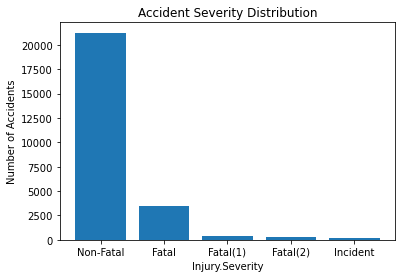

In [43]:
severity_counts = df['Injury.Severity'].value_counts().head()

plt.figure()
plt.bar(severity_counts.index, severity_counts.values)
plt.xlabel("Injury.Severity")
plt.ylabel("Number of Accidents")
plt.title("Accident Severity Distribution")
plt.show()

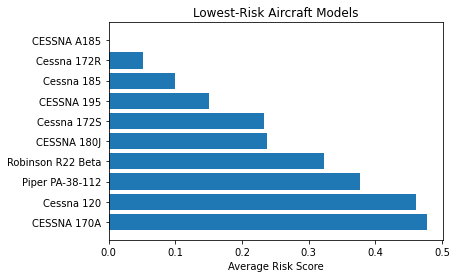

In [44]:
top10 = low_risk_aircraft.head(10)

plt.figure()
plt.barh(
    top10['Make'] + " " + top10['Model'],
    top10['Avg_Risk_Score']
)
plt.xlabel("Average Risk Score")
plt.title("Lowest-Risk Aircraft Models")
plt.gca().invert_yaxis()
plt.show()

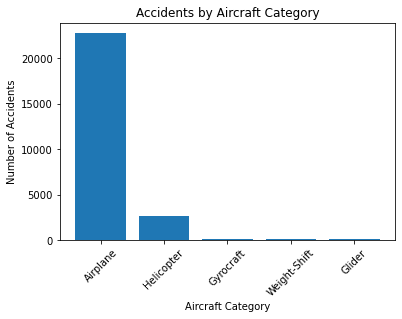

In [47]:
category_counts = df['Aircraft.Category'].value_counts().head()

plt.figure()
plt.bar(category_counts.index, category_counts.values)
plt.xlabel("Aircraft Category")
plt.ylabel("Number of Accidents")
plt.title("Accidents by Aircraft Category")
plt.xticks(rotation=45)
plt.show()